# Homework 1 - Part 2

**Due: Monday, February 7, 11:59 PM**

This is an individual assignment.

# Problem 1

## Dataset Description

In this homework will be working with the **Bike Sharing Dataset**. 

> **Dataset Information**\
\
*Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.\
\
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.*

This dataset contains 731 instances annotated daily with several features (also called attributes).

> **Features Information**\
\
```season```: season (1:winter, 2:spring, 3:summer, 4:fall)\
```yr```: year (0: 2011, 1:2012)\
```mnth```: month ( 1 to 12)\
```hr```: hour (0 to 23)\
```holiday```: wether day is holiday or not\
```weekday```: day of the week\
```workingday```: if day is neither weekend nor holiday is 1, otherwise is 0.\
```weathersit```: 1 - Clear, Few clouds, Partly cloudy, Partly cloudy; 2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.\
```temp```: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)\
```atemp```: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)\
```hum```: Normalized humidity. The values are divided to 100 (max)\
```windspeed```: Normalized wind speed. The values are divided to 67 (max)

The dependent variable (target) is:

>```cnt```: count of total rental bikes including both casual and registered

For more information about this dataset, you may visit its UCI ML Repository page: [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Let's load the data as a ```pandas``` dataframe:

In [1]:
import pandas as pd
df = pd.read_csv('day.csv')
df = df.drop(columns=['instant','dteday','casual','registered'])
# disregarding some of the original attributes for the purposes of this assignment

# The dataset for the rest of the assignment is as follows:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


## Problem 1 Description

In this problem, you will implement a **Linear Regression model with ridge regularization** to predict the total rental bikes (```cnt```) **using the 11 features provided**. In your ML experimentation, consider the coefficient of determination, $r^2$, as your performance metric. 

Be sure to include all experimental design steps to train and evaluate your final model, including: normalization, train/test split, 10-fold cross-validation, training and evaluation.

* Your final answer should include the implementation of all steps mentioned above, and the final model performance in the test set. 

* Your final answer should also include a small paragraph discussing the overal model performance including whether or not the model has overfitted and model complexity.

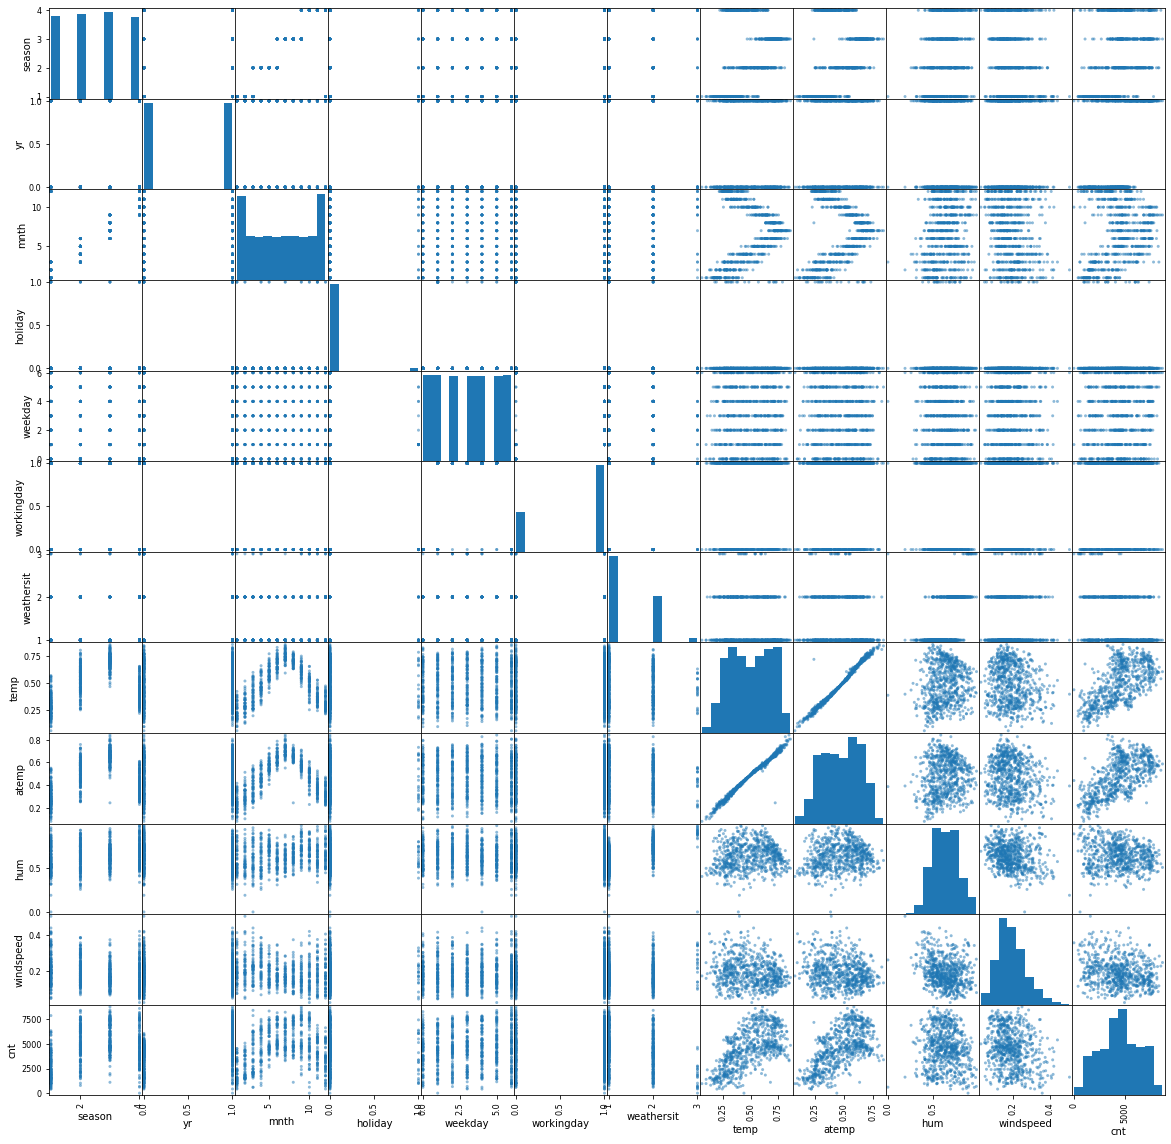

In [2]:
pd.plotting.scatter_matrix(df, figsize = (20,20));

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.stats import linregress

In [4]:
def LinearRegression_RidgeReg(X, t, lam):
    w = np.linalg.inv(X.T@X + lam*np.eye(X.shape[1]))@X.T@t
    y = X@w
    e = t-y
    return w, y, e
    
def LinearRegression_test(X, w):
    y = X@w 
    return y

First thing we want to do is export the dataframe to individual numpy arrays. The array x consists of the features that we will use to train the model. The array t consists of the target values for the amount of bikes rented. The independent variables are normalized so that all features are in the same range of values and will allow for the model to run more efficiently. These arrays will be split into a training set and a test set. By splitting data into train and test sets, we are able to evaluate the final performance of our model. We will use a test set that is 20% of the total data set.

In [5]:
features = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]
x = df[features].to_numpy()
x = np.array([(v-np.min(v)/(np.max(v)-np.min(v))) for v in x.T]).T
target = "cnt"
t = df[target].to_numpy()

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2)

Next we want to determine what the best regularizer hyperparameter to use and for this we are using 10-fold cross-validation. Since we have a large enough data set, we are able to section off 90% of the data to be used for training the model in each iteration and still have enough data to properly validate the model. Using 10-fold cross-validation will allow us to find the optimal regularizing parameter to use when we train the final model. I originally was only testing lambda in the range of 0.1 to 1.0 with 0.1 step size but I was getting values like 0.9 and 1.0 so I raised the range of values to search for up to 2.0.

In [6]:
k_folds = 10
Lam_range = np.arange(0.1,2.1,0.1)
r_sq_val_ar = []

kf = KFold(n_splits=k_folds, shuffle=True)

The next step is to run the cross-validation. In each iteration of lambda, the data is split into 10-folds and the model is trained using 9 of those 10 folds and the last is used to test the goodness-of-fit of the trained model. When all 10-folds are tested and validated, the average is calculated and is assigned to that value of lambda. All the values specified for lambda are tested, and the lambda with the highest average coefficient of determination is selected and used to train the final model.

In [7]:
for lam in Lam_range:
    print(f'Lamda={lam}')
    r_sq_val_avg = 0
    for train_i, val_i in kf.split(x_train):
        x_train_fold = x_train[train_i]
        x_val_fold = x_train[val_i]
        t_train_fold = t_train[train_i]
        t_val_fold = t_train[val_i]

        w, y_train, _ = LinearRegression_RidgeReg(x_train_fold, t_train_fold, lam)

        y_val = LinearRegression_test(x_val_fold, w)

        _, _, r_sq_val, _, _ = linregress(np.sort(t_val_fold), np.sort(y_val))
        r_sq_val_avg += r_sq_val**2
    print(f'R sq validation average: {r_sq_val_avg/k_folds}')
    print('-------------------------------------------------\n')
    r_sq_val_ar.append(r_sq_val_avg/k_folds)

Lamda=0.1
R sq validation average: 0.9763478776424501
-------------------------------------------------

Lamda=0.2
R sq validation average: 0.9777705604279803
-------------------------------------------------

Lamda=0.30000000000000004
R sq validation average: 0.9816393190211574
-------------------------------------------------

Lamda=0.4
R sq validation average: 0.9752706987359707
-------------------------------------------------

Lamda=0.5
R sq validation average: 0.9801041315965413
-------------------------------------------------

Lamda=0.6
R sq validation average: 0.9812050056582116
-------------------------------------------------

Lamda=0.7000000000000001
R sq validation average: 0.9773798323686315
-------------------------------------------------

Lamda=0.8
R sq validation average: 0.9814585409639731
-------------------------------------------------

Lamda=0.9
R sq validation average: 0.977905523772845
-------------------------------------------------

Lamda=1.0
R sq validation

In [8]:
Lam_max = (np.argmax(r_sq_val_ar)+1)/10.
print(f'Lambda that maximizes R sq: {Lam_max}')

Lambda that maximizes R sq: 0.3


This is the training and testing of the final model. The lamda value that was selected above is then used to train the model with the test set. The coefficient of determination is then calculated using the test set and the model predictions. 

In [9]:
w, y_train, _ = LinearRegression_RidgeReg(x_train, t_train, Lam_max)
y_test = LinearRegression_test(x_test, w)

_, _, r_sq_test, _, _ = linregress(np.sort(t_test), np.sort(y_test))
print(f'R sq test: {r_sq_test}')

R sq test: 0.9944090496929473


The performance of the model is good, we generally want an R squared value >> 0.99. This is an indication that our model has not overfitted or memorized the training data. We can confidently say that this model is able to predict the price of a house given unseen data. If we had a coefficient of determination that is much less than 0.99, we may have created an overfitted model. As the R squared value decreases, we see variation between the test set and the model predictions that cannot be explained by the independent variables. Judging from the scatter plot above, it seems like some data that was included might not give a meaningful contribution to the model and its possible that some features could've been removed in order to decrease model complexity. That being said, the model ran just fine and produced a respectable coefficient of determination so, while it may be possible to decrease model complexity, it surely isn't necessary.

# Problem 2

Suppose that a taxi company wants to estimate the average number of trips per hour for the upcoming Valentine's Day weekend. The company is working under the assumption that the number of passengers can be modeled with a Poisson random variable (RV) with parameter $\lambda$ ($\lambda>0$).

* The poisson RV with parameter $\lambda$ has the following probability mass function (PMF): $p(x) = \frac{\lambda^x e^{-\lambda}}{x!}$.

The company's engineers decide to use a Gamma RV with parameters $\alpha=5$ and $\beta=0.5$ as the prior probability for the unknown parameter $\lambda$.

* The Gamma RV with parameters $\alpha$ and $\beta$ ($\alpha,\beta>0$) has the following probability density function: $f(\lambda)=\frac{\beta^{\lambda}}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$.

Suppose that you have a set of data with 10 samples:
\begin{align*}
x=[12,  5, 10, 10,  7, 17, 6, 11, 9, 9]
\end{align*}

Answer the following questions:

1. Compute the MLE estimate for $\lambda$. Show all your work.

2. Compute the MAP estimate for $\lambda$. Show all your work.

In [10]:
from IPython.display import Image

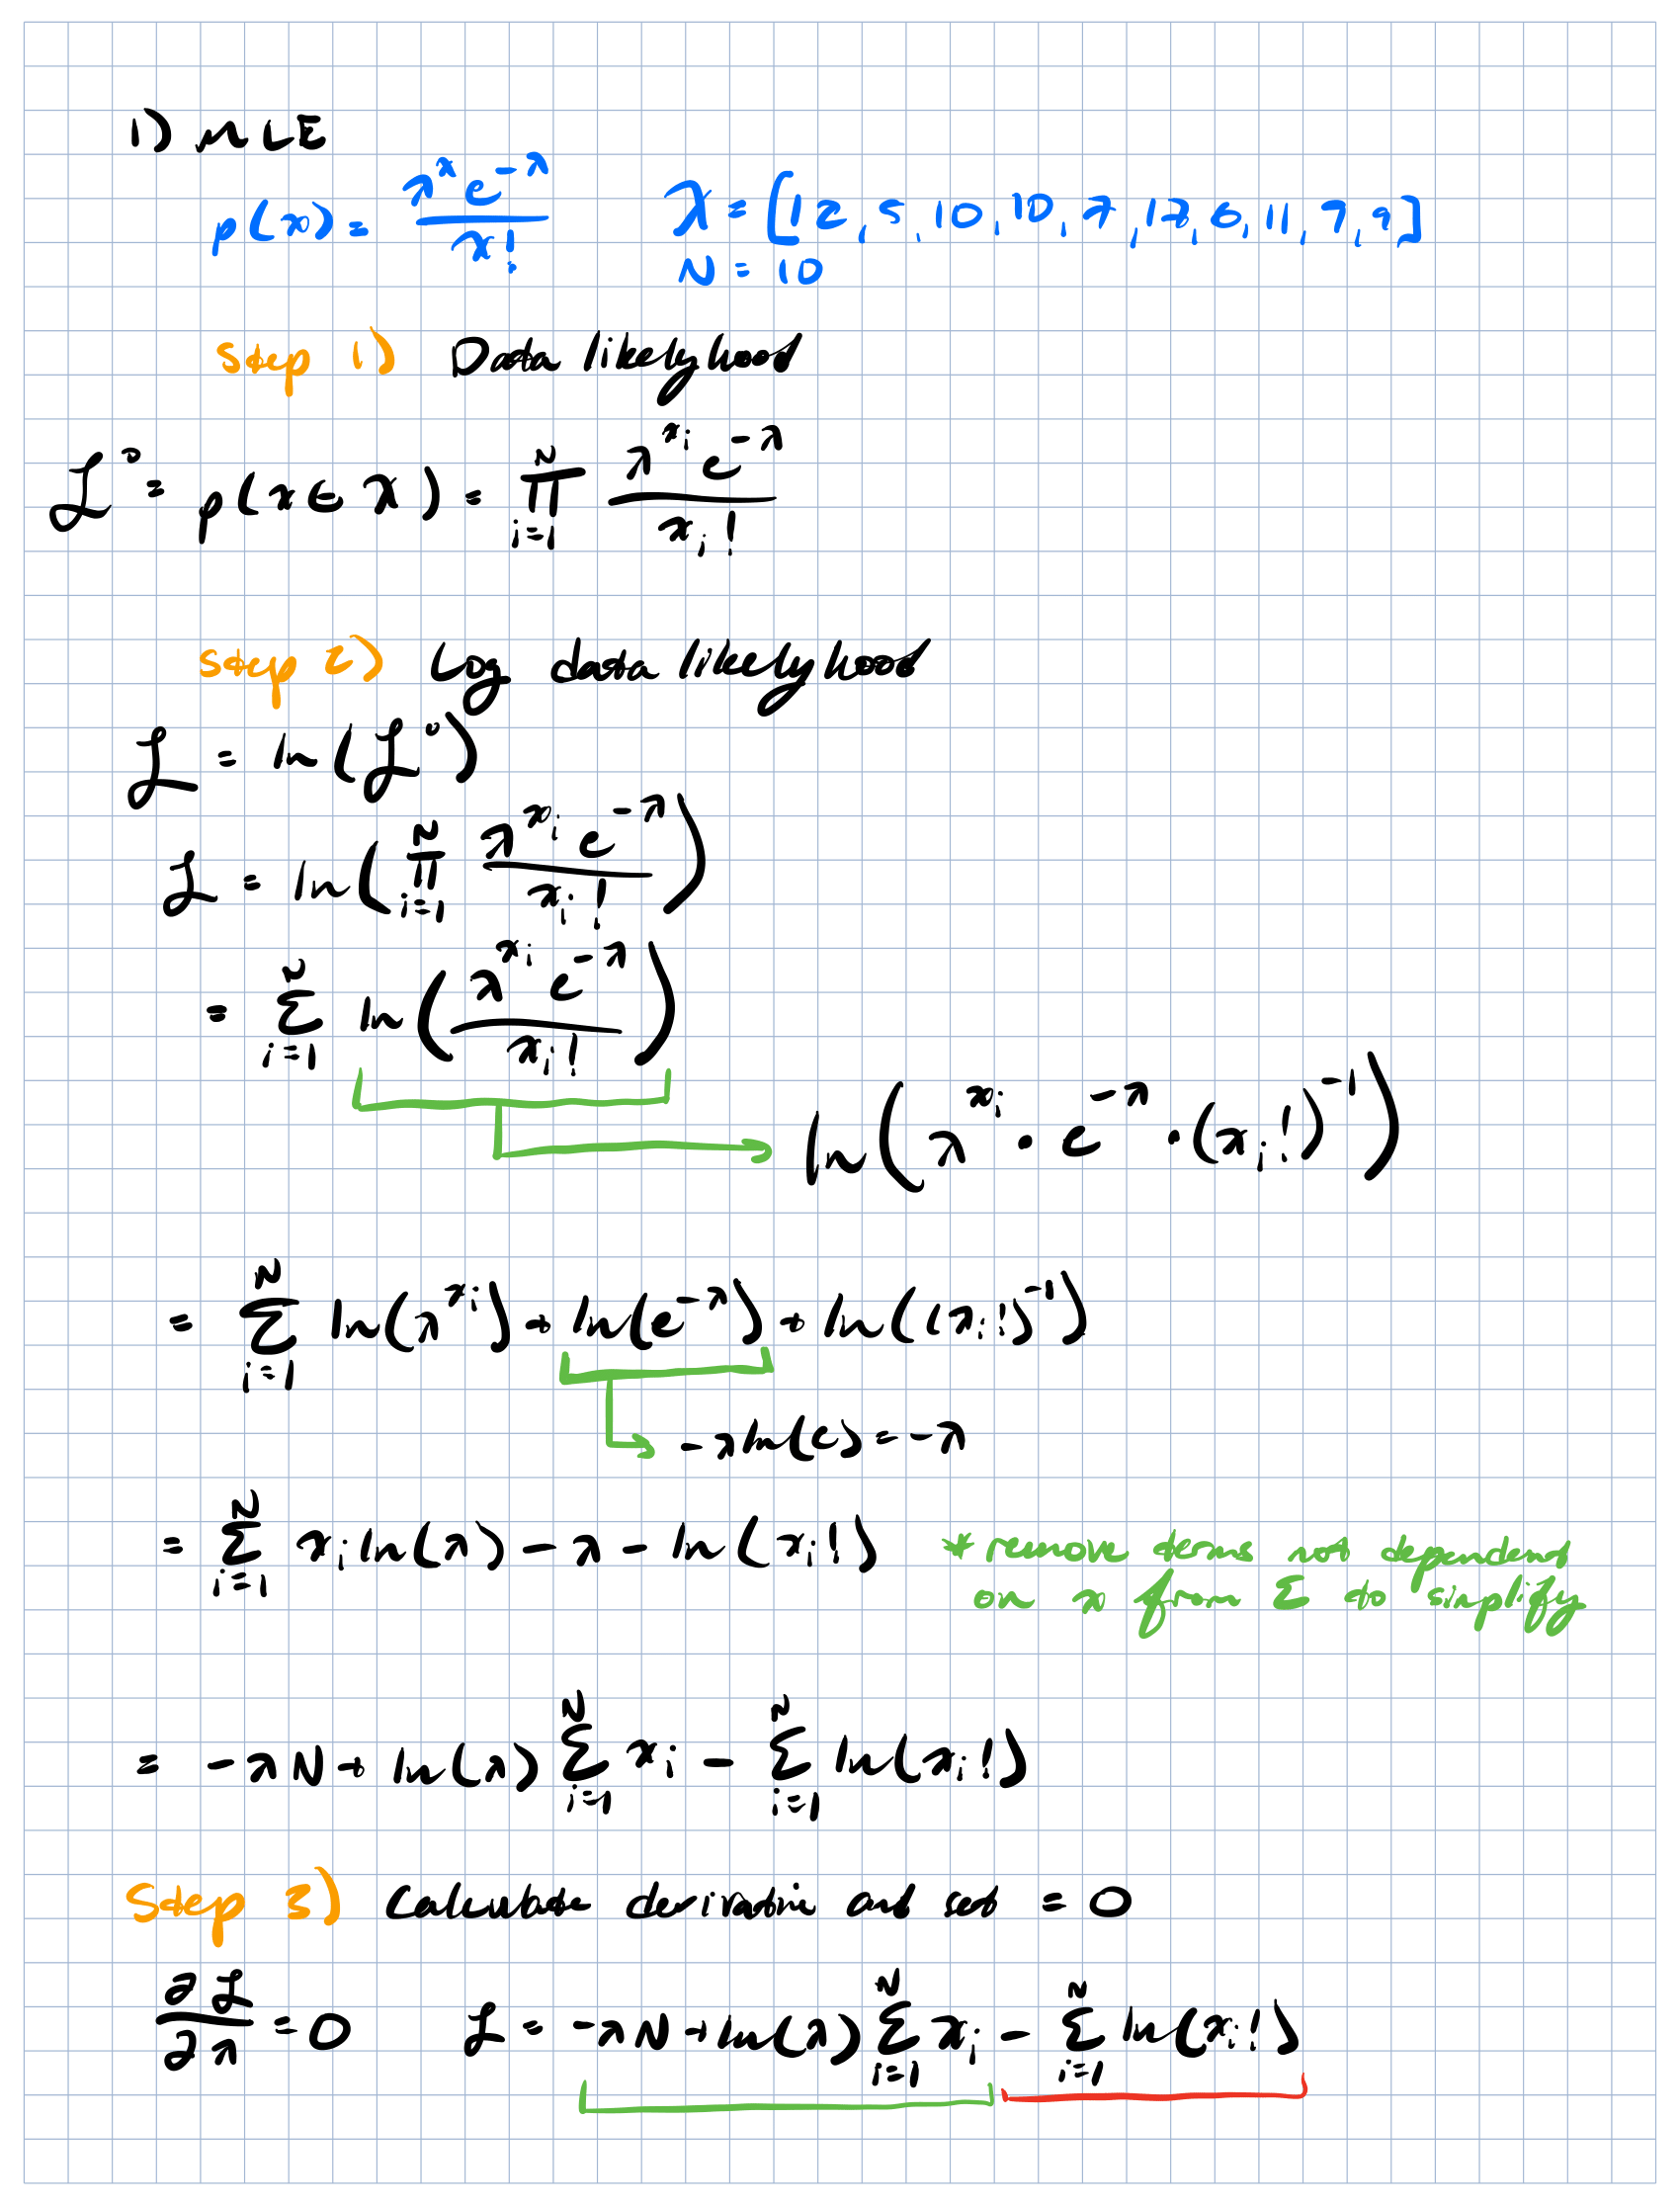

In [11]:
Image("Figures/HW_1-1.png", width=700)

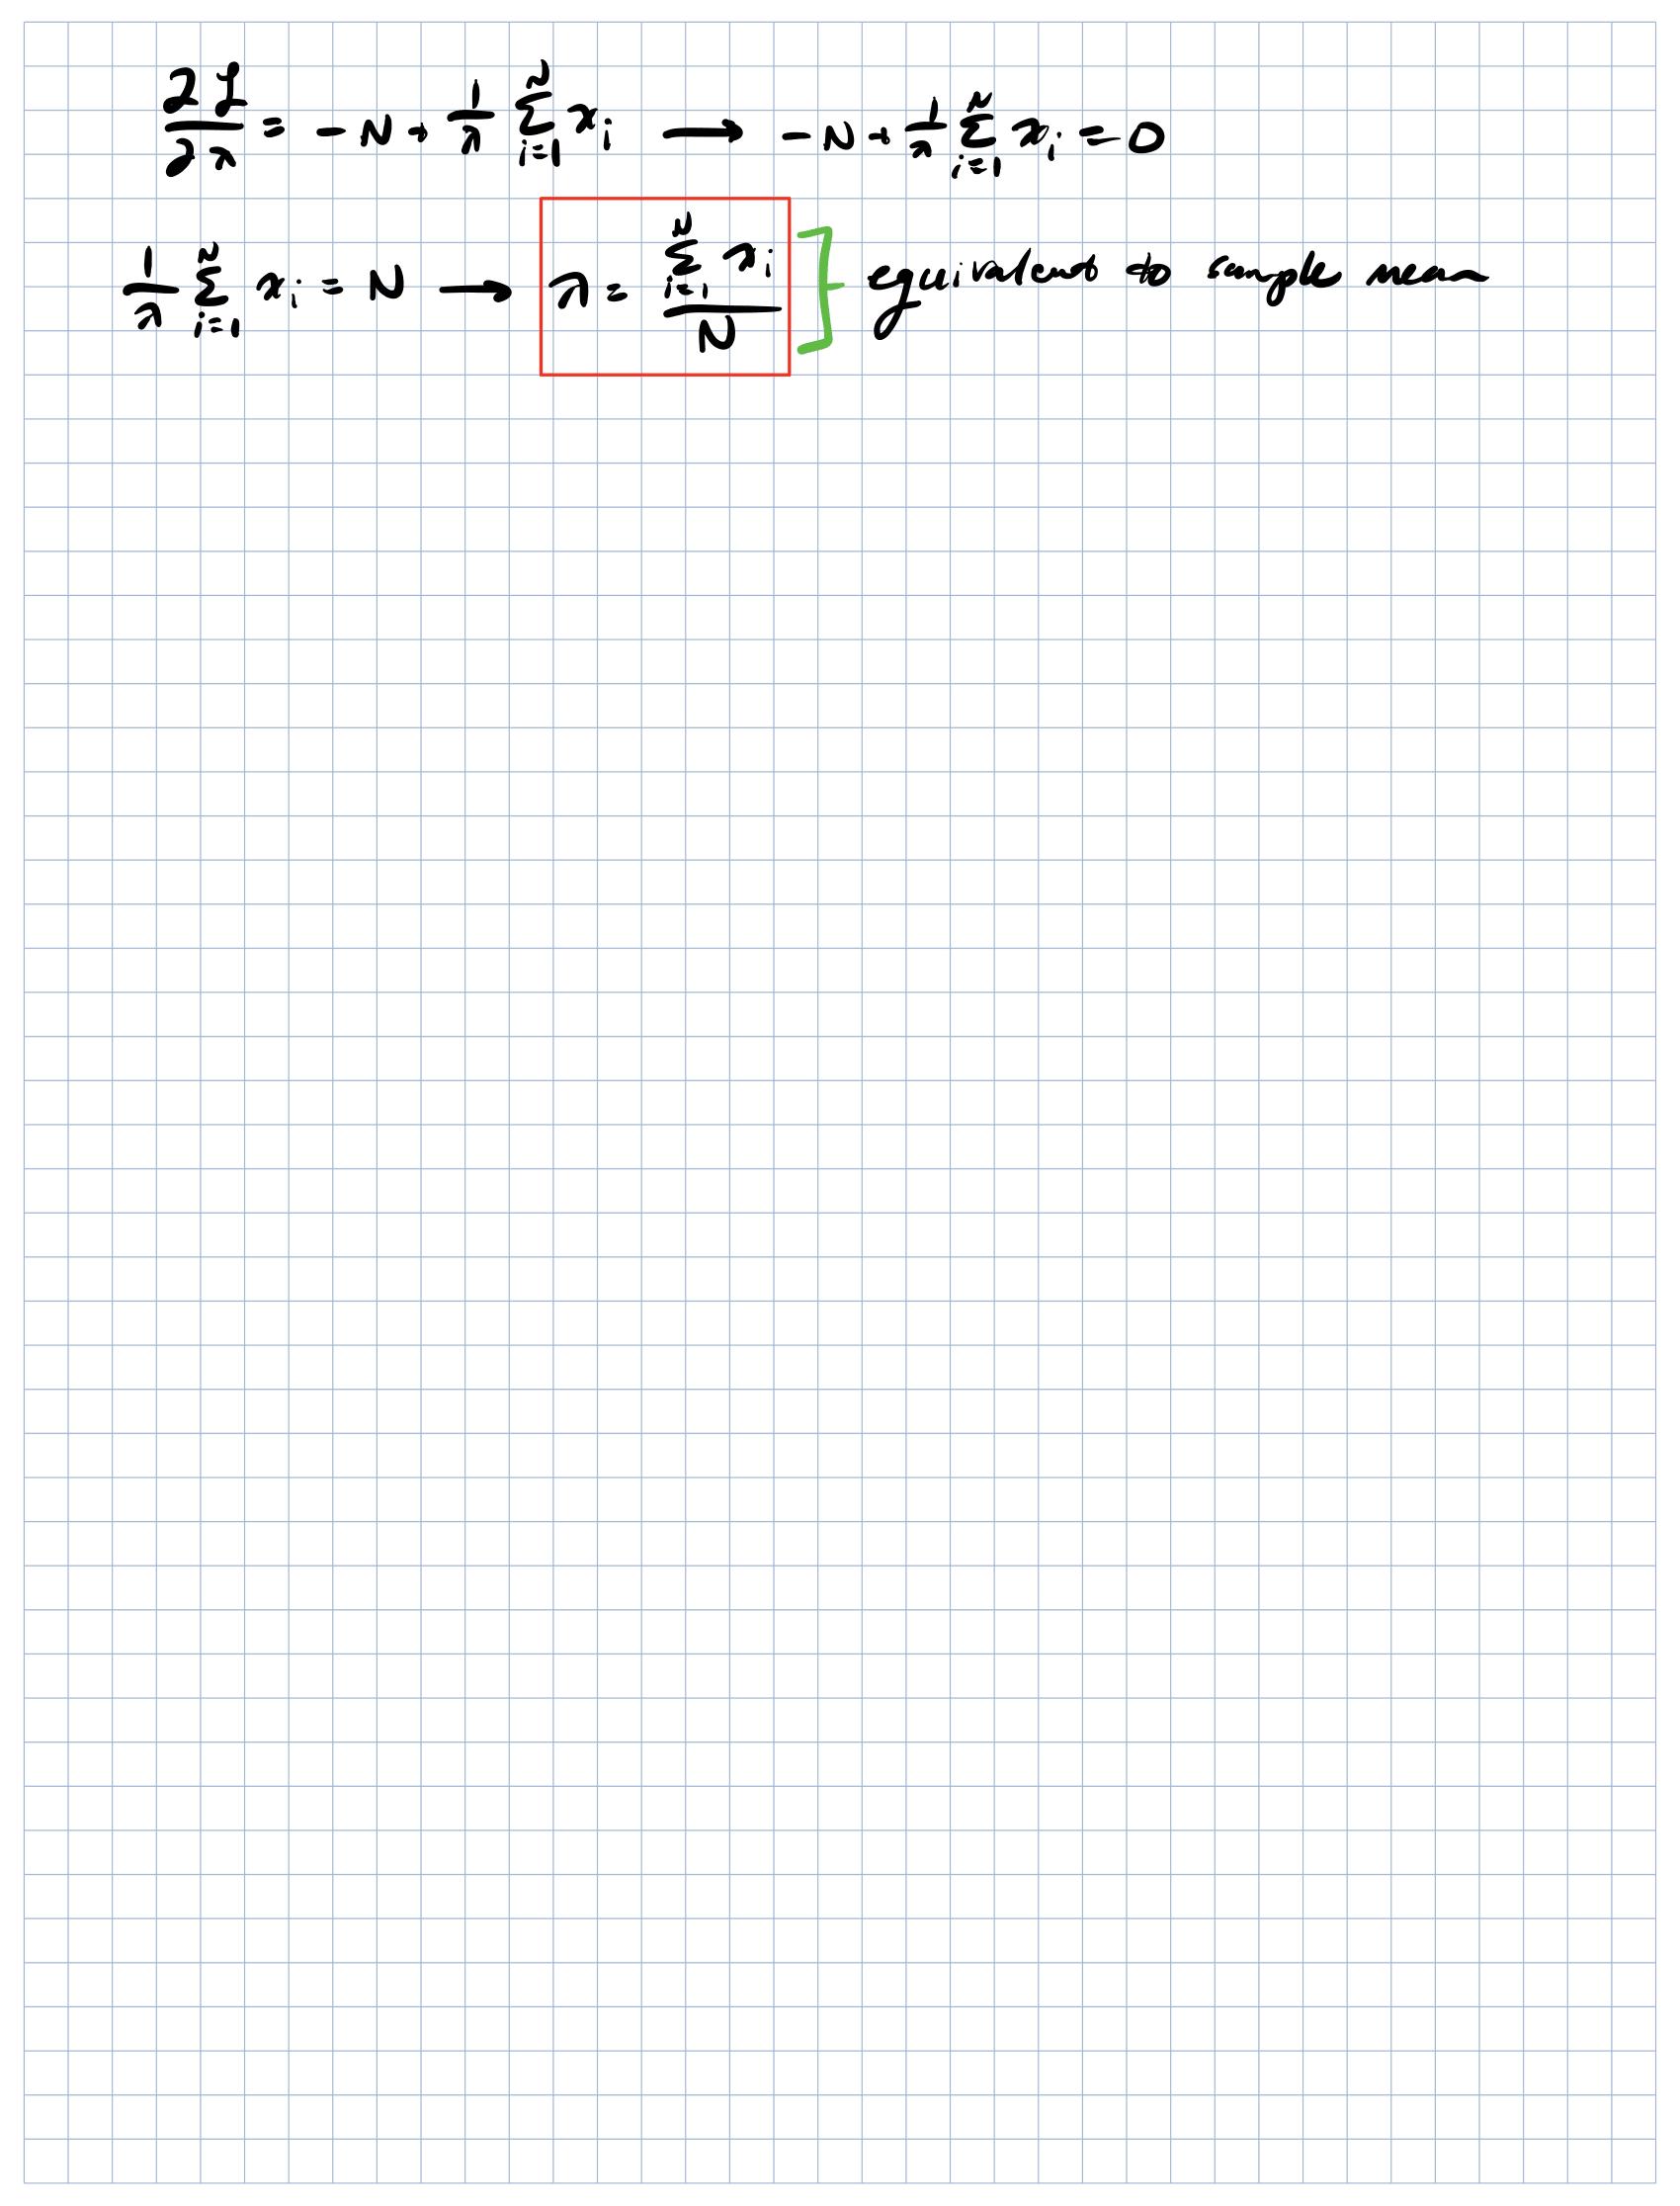

In [12]:
Image("Figures/HW_1-2.png", width=700)

The MLE estimate for lambda is just the sample mean as calulated above. Calculated it looks like:

In [13]:
x = np.array([12,5,10,10,7,17,6,11,9,9])
lam = np.mean(x)
print(lam)

9.6


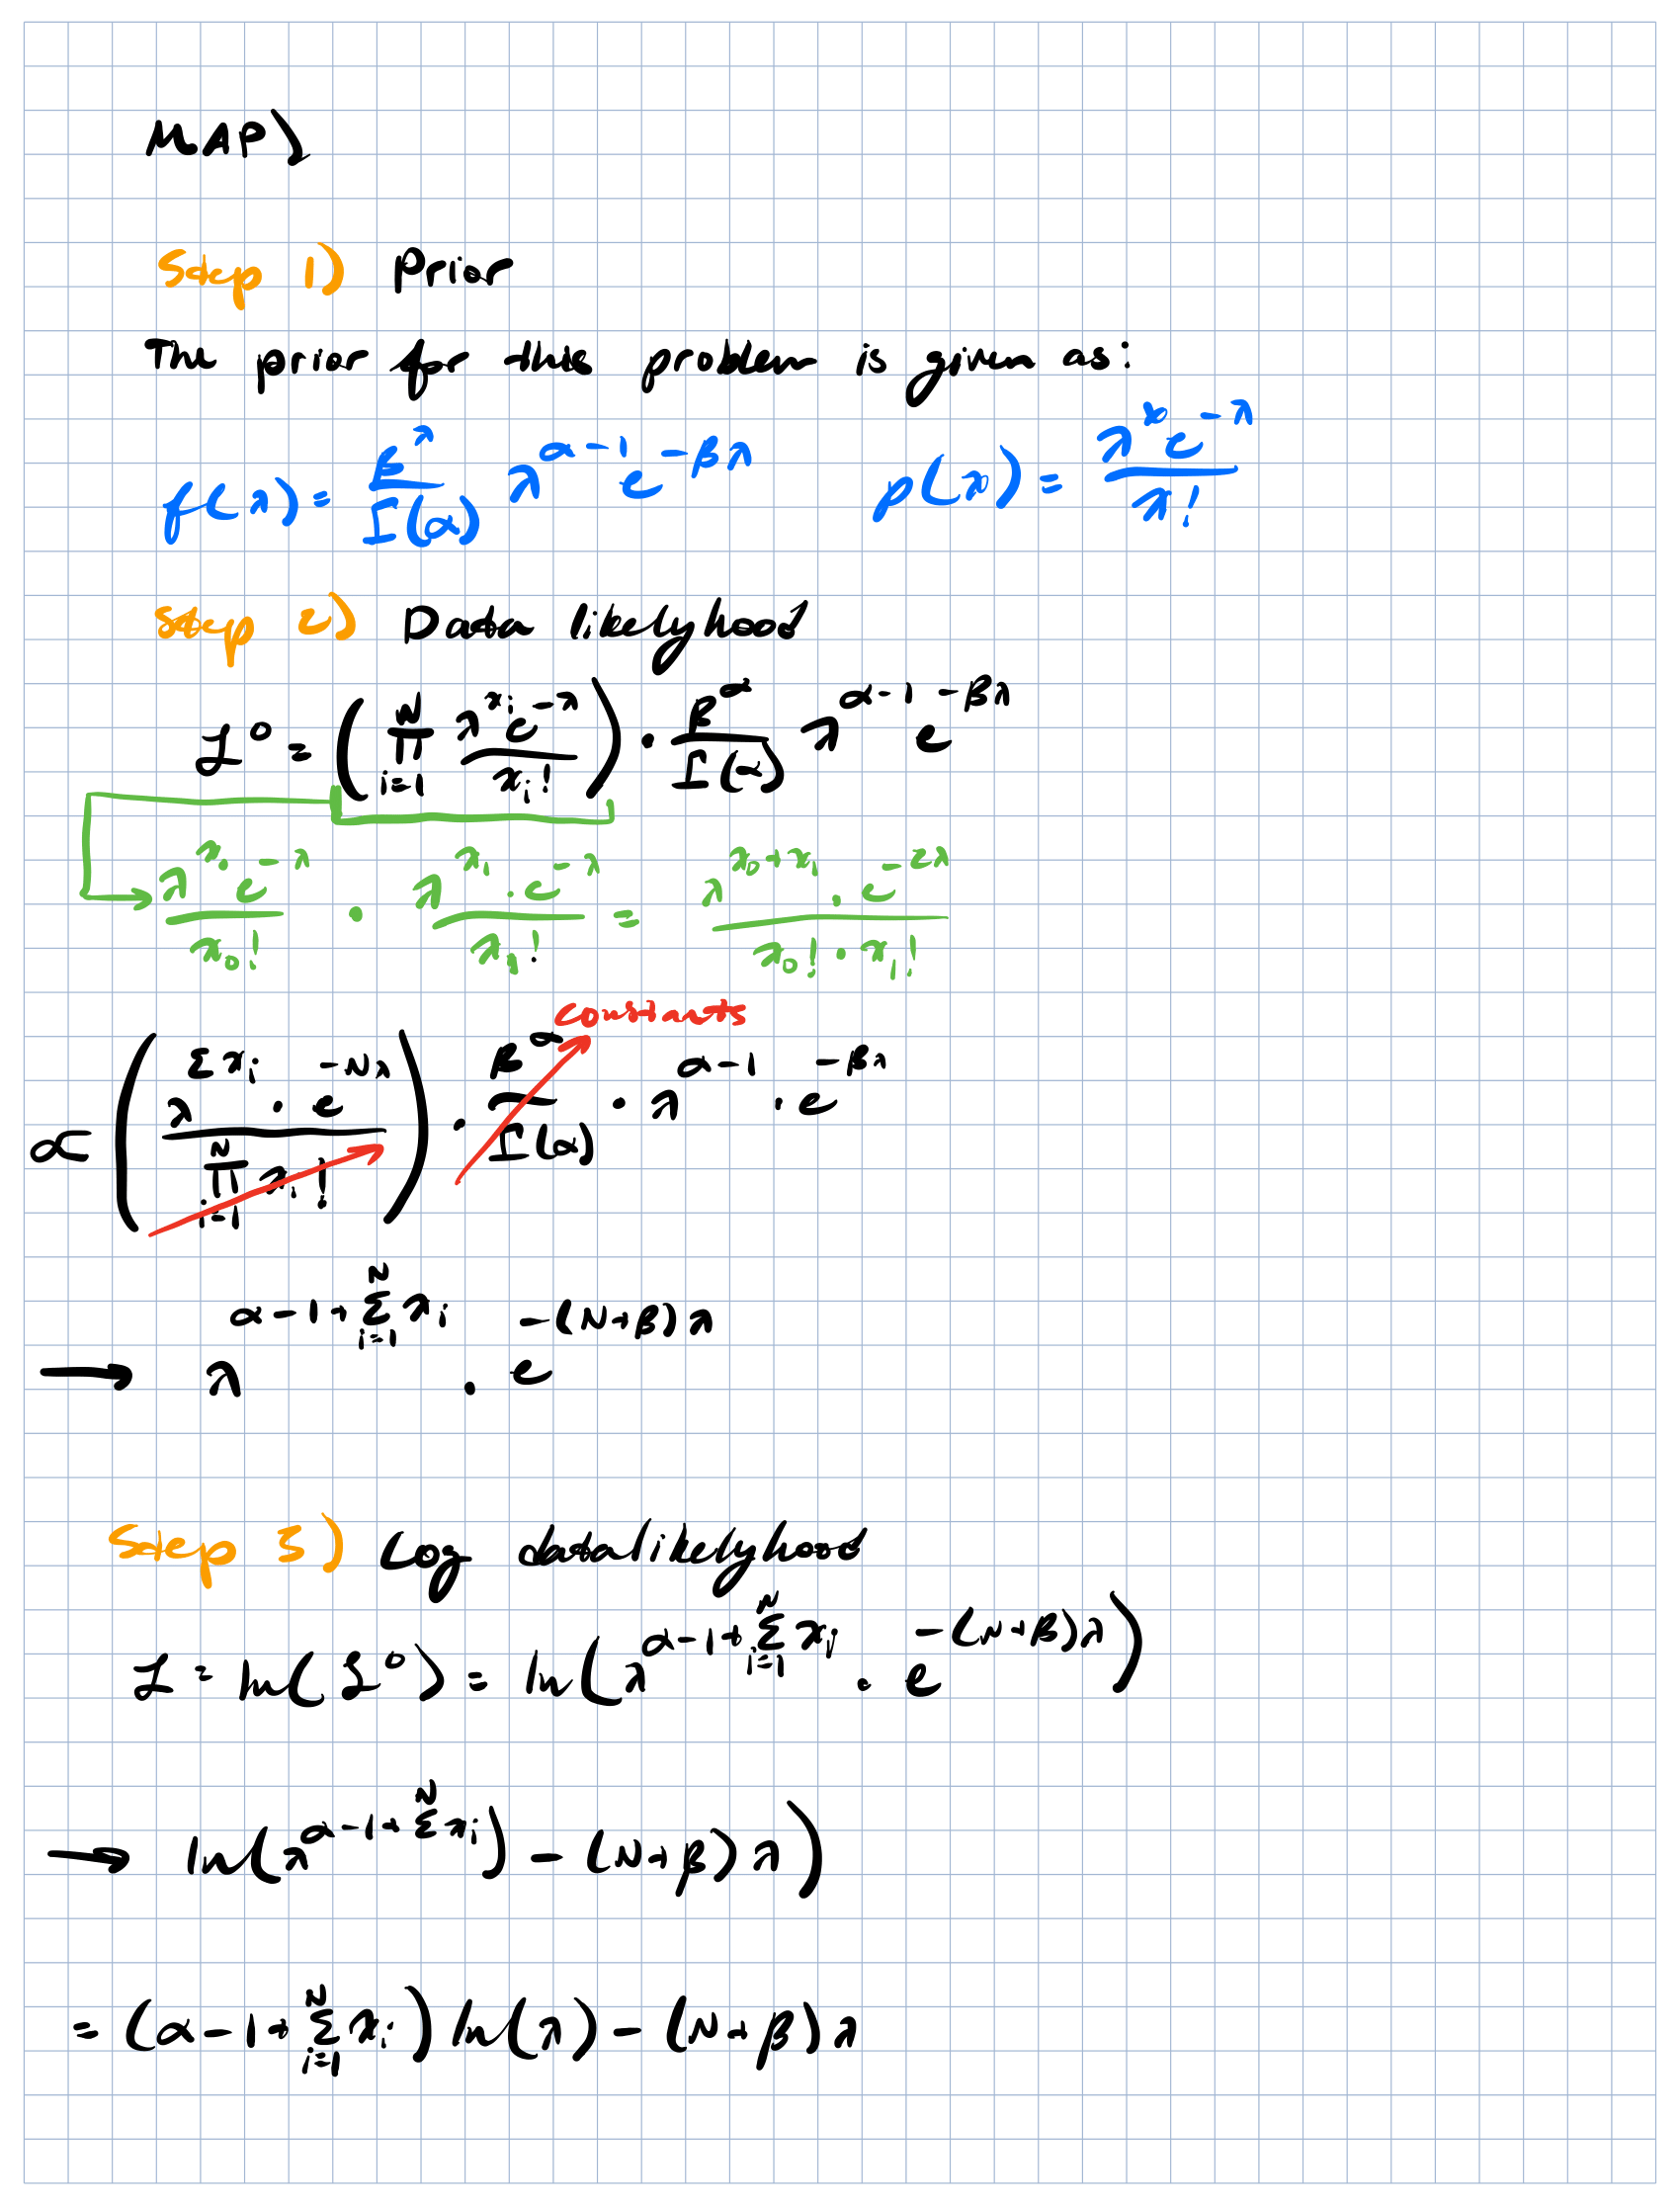

In [14]:
Image("Figures/HW_1-3.png", width=700)

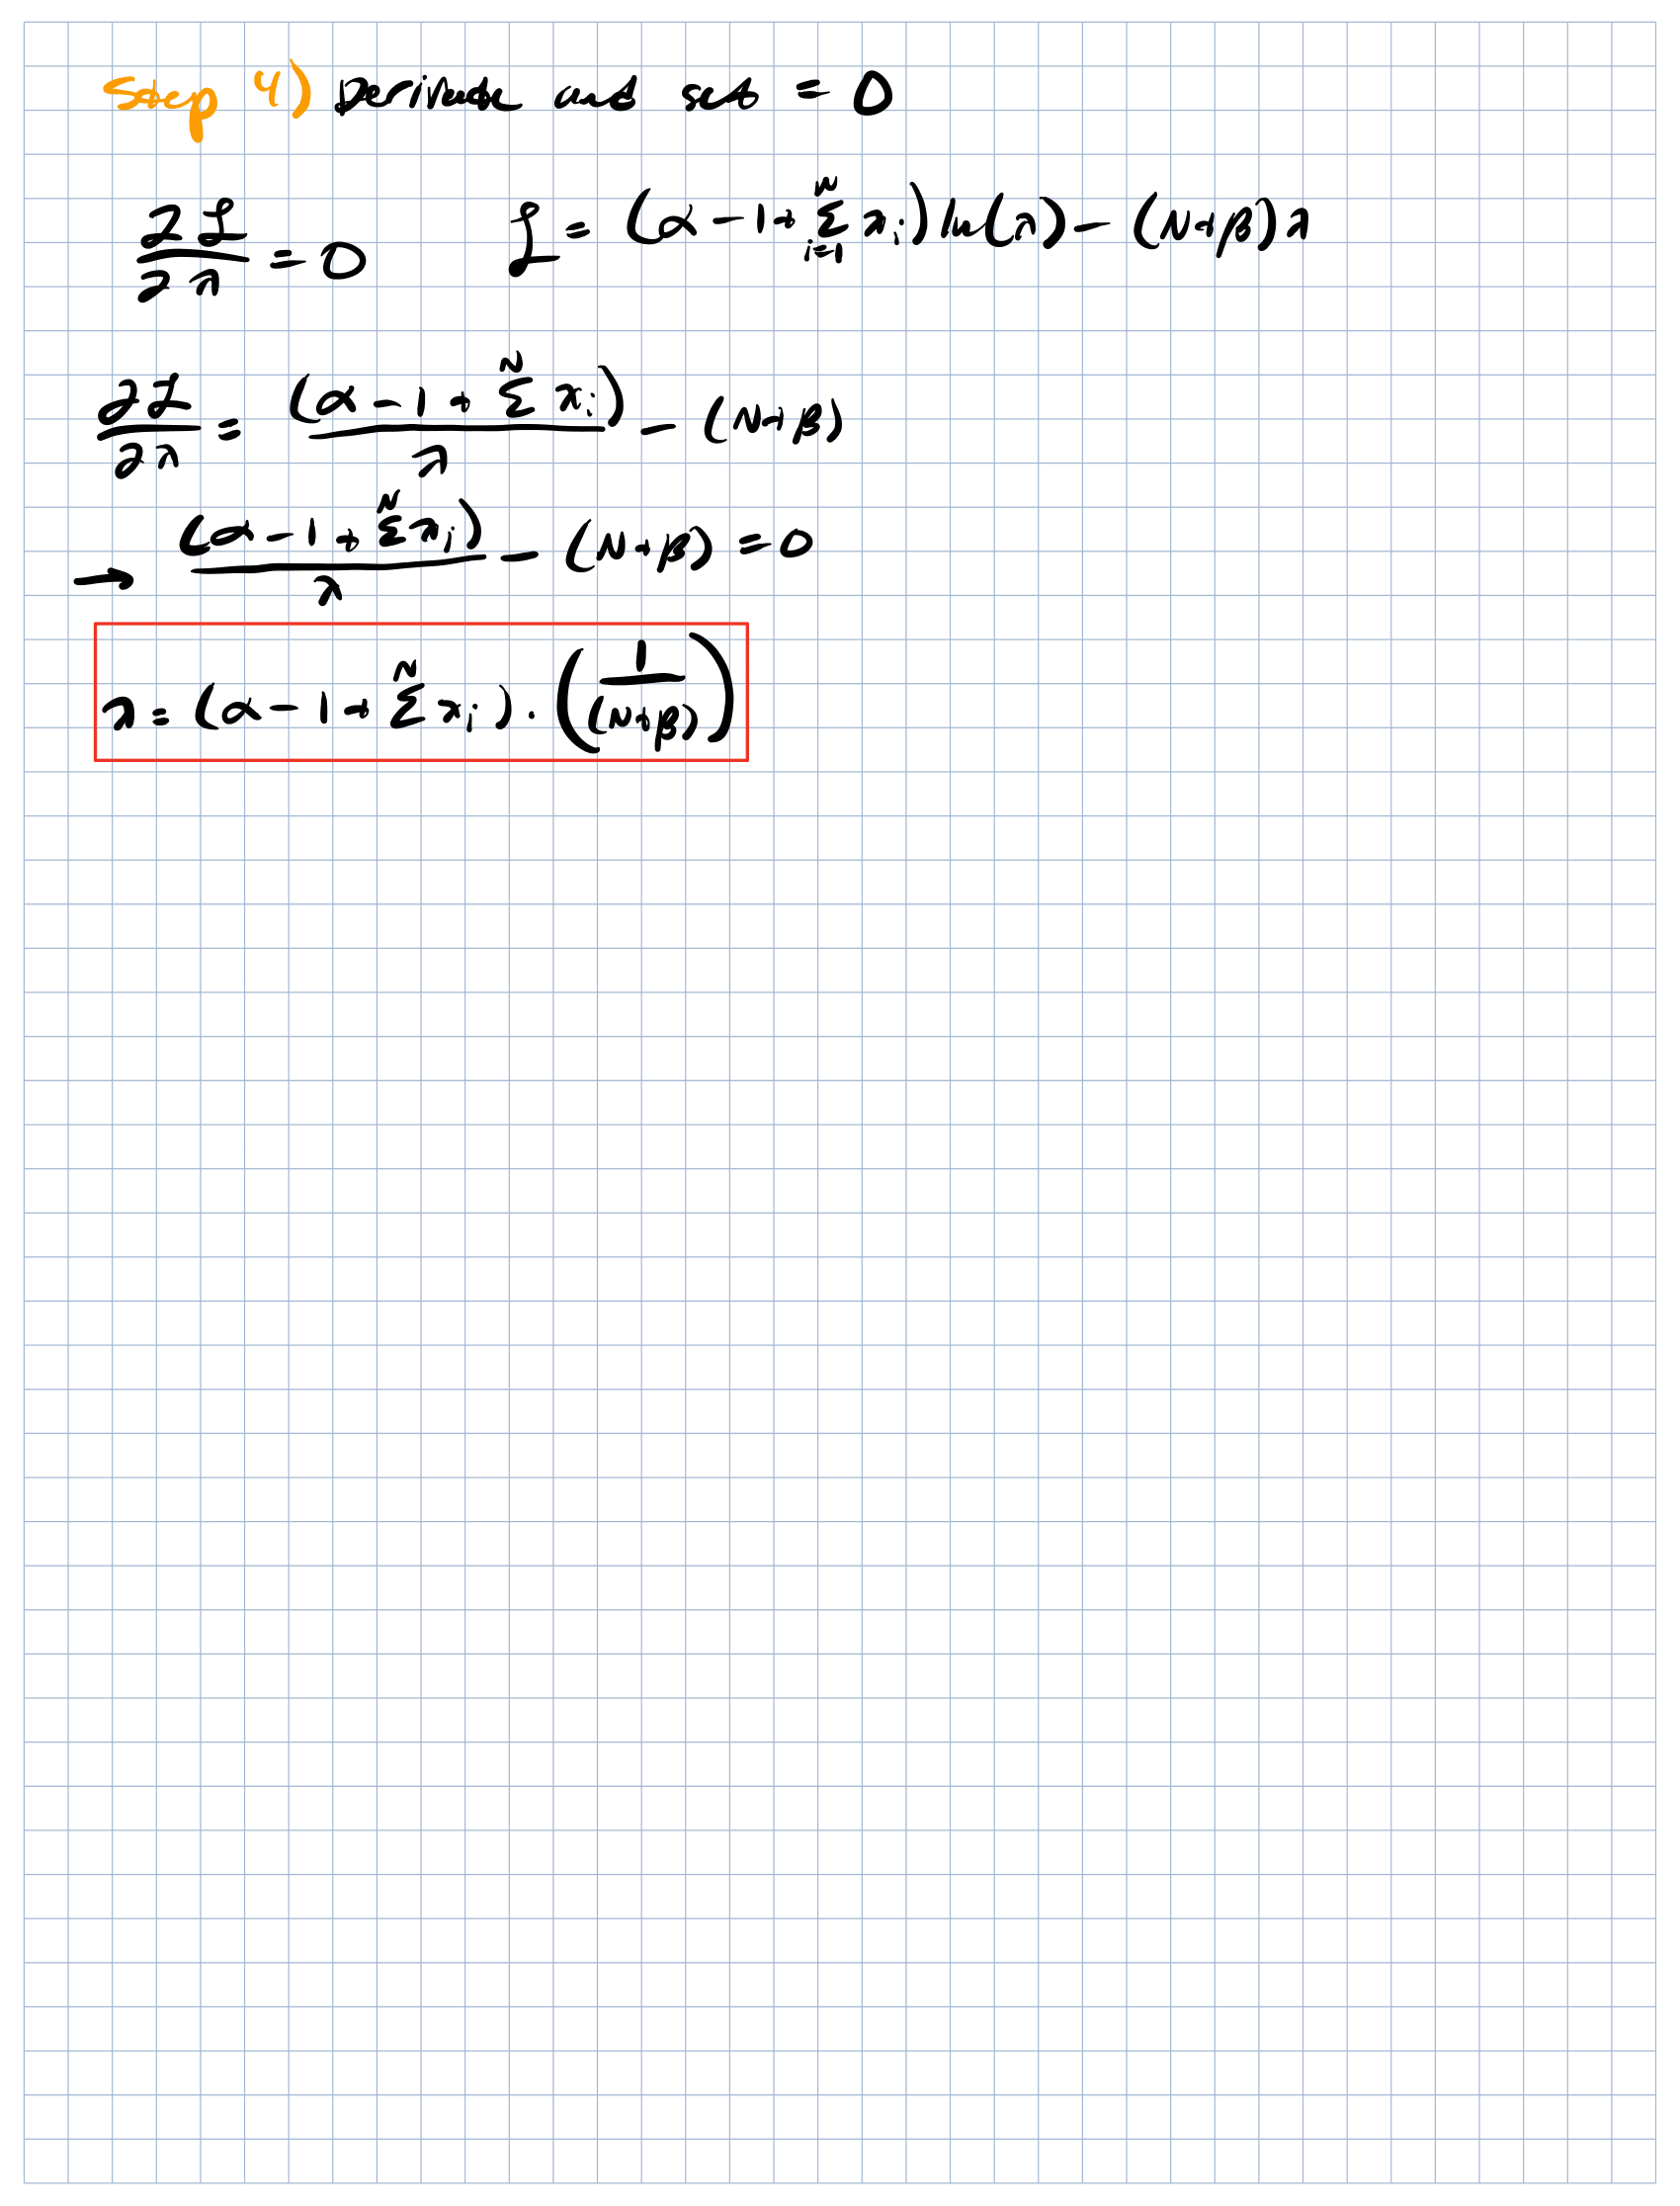

In [15]:
Image("Figures/HW_1-4.png", width=700)

The MAP estimate for lambda is calculated above. Calculated it looks like:

In [16]:
a = 5
b = 0.5
lam = (a - 1 + np.sum(x))*((1/(x.size+b)))
print(lam)

9.523809523809524


# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.